In [1]:
from sargan_models import SARGAN
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import os
import skimage.measure as ski_mem
import matplotlib.pyplot as plt
from sar_utilities import add_gaussian_noise, preprocess_test
import random



# average PSNR: 26.0251890108


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
INFO:tensorflow:Restoring parameters from /home/grad3/hle/data/trained_models/checkpoint/sar_dict_target_distance_20_freq_corrupted_real_minus1_1_coef_range_model_197.ckpt
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


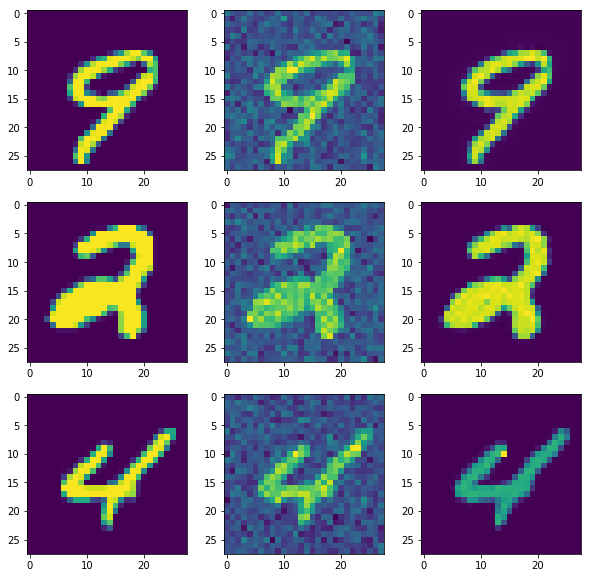

average PSNR: 26.0251890108
10


In [2]:
DATA_PATH = "/home/grad3/hle/data"
model_trained_epoch = 197
model_path_test = os.path.join(DATA_PATH,
                               "trained_models/checkpoint/",
                               "sar_dict_target_distance_20_freq_corrupted_real_minus1_1_coef_range_model_{}.ckpt".format(model_trained_epoch))
#size of image to feed into SARGAN model
img_size = (28,28)
batch_size = 1

# setup matplotlib figure to print out original and recovered imgs
fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 3
j = 1

mnist = input_data.read_data_sets('MNIST_data', validation_size=0)
num_test = 100
batch_X, _ = mnist.test.next_batch(num_test)

model = SARGAN(img_size, batch_size)
saver = tf.train.Saver()

gpu = "3"
gpu_options = tf.GPUOptions(allow_growth=True, visible_device_list=gpu)
config=tf.ConfigProto(gpu_options=gpu_options)

sum_psnr = 0
with tf.Session(config=config) as sess:
    saver.restore(sess, model_path_test)
    
    for i in range(num_test):
        img = batch_X[i].reshape(1,784)
        cond = img.copy()
        pcond = add_gaussian_noise(cond, sd=0.15)
        pimg, pcond = preprocess_test(img, pcond, (28, 28))
        gen_img = sess.run(model.gen_img, feed_dict={model.image:pimg, model.cond:pcond})
        
        psnr_value = ski_mem.compare_psnr(pimg, gen_img, 1)
        sum_psnr += psnr_value
        if i % 30 == 0:
            if j > 9:
                continue
            fig.add_subplot(rows, columns, j)
            j += 1
            print_img = img.reshape(28,28)
            plt.imshow(print_img)
            fig.add_subplot(rows, columns, j)
            j += 1
            plt.imshow(pcond[0, :, :, 0])
            fig.add_subplot(rows, columns, j)
            j += 1
            plt.imshow(gen_img[0, :, :, 0])
            print(gen_img[0, :, :, 0].shape)
            print(print_img.shape)
plt.show()
print("average PSNR: %s" % (sum_psnr/100))
print(j)

    
    


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
INFO:tensorflow:Restoring parameters from /scratch/hle/data/trained_models/checkpoint/mnist_small_mask_corrupted_mnist_images_corrupted_by_center_mask_model_41.ckpt
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


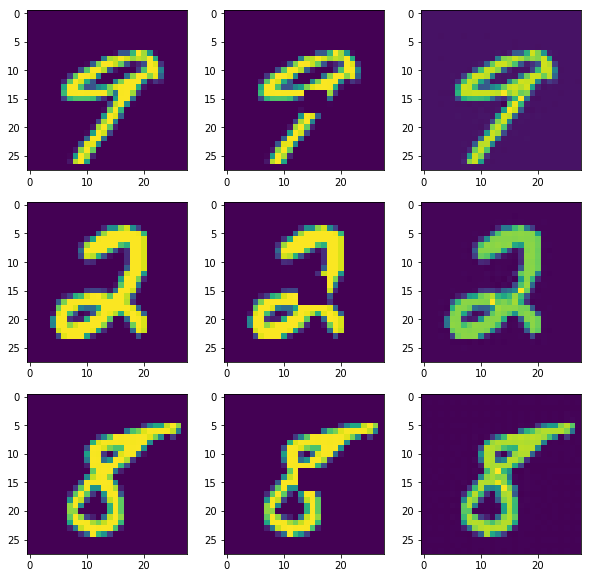

average PSNR: 28.7365516738
10


In [2]:
DATA_PATH = "/scratch/hle/data/"
model_trained_epoch = 41
model_path_test = os.path.join(DATA_PATH,
                               "trained_models/checkpoint/",
                               "mnist_small_mask_corrupted_mnist_images_corrupted_by_center_mask_model_{}.ckpt".format(model_trained_epoch))
#size of image to feed into SARGAN model
img_size = (28,28)
batch_size = 1
mask_sizes = [4,5,6]
left_corner_indices = [12,13,14]

# setup matplotlib figure to print out original and recovered imgs
fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 3
j = 1

mnist = input_data.read_data_sets('MNIST_data', validation_size=0)
num_test = 100
batch_X, _ = mnist.test.next_batch(num_test)

model = SARGAN(img_size, batch_size)
saver = tf.train.Saver()

gpu = "3"
gpu_options = tf.GPUOptions(allow_growth=True, visible_device_list=gpu)
config=tf.ConfigProto(gpu_options=gpu_options)

sum_psnr = 0
with tf.Session(config=config) as sess:
    saver.restore(sess, model_path_test)
    
    for i in range(num_test):
        img = batch_X[i].reshape(28,28)
        cond = img.copy()
        #add mask and reshape
        mask_size = random.choice(mask_sizes)
        left_corner_index = random.choice(left_corner_indices)
        cond[left_corner_index : left_corner_index + mask_size, left_corner_index : left_corner_index + mask_size] = 0
        img = img.reshape(1, 784)
        cond = cond.reshape(1,784)

        pimg, pcond = preprocess_test(img, cond, (28, 28))
        gen_img = sess.run(model.gen_img, feed_dict={model.image:pimg, model.cond:pcond})
        
        psnr_value = ski_mem.compare_psnr(pimg, gen_img, 1)
        sum_psnr += psnr_value
        if i % 30 == 0:
            if j > 9:
                continue
            fig.add_subplot(rows, columns, j)
            j += 1
            print_img = img.reshape(28,28)
            plt.imshow(print_img)
            fig.add_subplot(rows, columns, j)
            j += 1
            plt.imshow(pcond[0, :, :, 0])
            fig.add_subplot(rows, columns, j)
            j += 1
            plt.imshow(gen_img[0, :, :, 0])
            print(gen_img[0, :, :, 0].shape)
            print(print_img.shape)
plt.show()
print("average PSNR: %s" % (sum_psnr/100))
print(j)
# average PSNR: 28.7365516738
    